In [121]:
import git
import os
import pandas as pd
from glob import glob
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
# functions

def make_time_series(df,country='Global'):
    """
    Function to make a time series of the Confirmed/Deaths/Recovered per country
    or globaly.
    
    Input:
    - df: DataFrame, not null, must be the df we have been using
    - country: String, default 'Global', country which we want to analyze
    
    Output:
    - DataFrame with the time Series
    """
    #df = df['Last Update', 'Country/Region', 'Province/State','Confirmed','Deaths','Recovered']
    
    if country=='Global':
        out = df.groupby('Last Update').sum()
        out['Mortality Rate'] = out['Deaths']/out['Confirmed']
        out['Dif Confirmed'] = out['Confirmed'].diff()
        out['Dif Confirmed%'] = diff_percentage(out['Confirmed'])
        out['Dif Deaths'] = out['Deaths'].diff()
        out['Dif Deaths%'] = diff_percentage(out['Deaths'])
        out['Dif Recovered'] = out['Recovered'].diff()
        out['Dif Recovered%'] = diff_percentage(out['Recovered'])
        out['']
        return out
    else:
        try:
            out = df.groupby(by=['Country/Region','Last Update']).sum().loc[country]
            out['Mortality Rate'] = out['Deaths']/out['Confirmed']
            out['Dif Confirmed'] = out['Confirmed'].diff()
            out['Dif Confirmed%'] = diff_percentage(out['Confirmed'])
            out['Dif Deaths'] = out['Deaths'].diff()
            out['Dif Deaths%'] = diff_percentage(out['Deaths'])
            out['Dif Recovered'] = out['Recovered'].diff()
            out['Dif Recovered%'] = diff_percentage(out['Recovered'])
            return out
        except:
            print('Country is not valid, please try again.')
            
def diff_percentage(series):
    dif = [np.nan]
    for i in range(1,len(series)):
        dif.append(series[i]/series[i-1]-1)
    return(dif)

def add_factor(dataframe,column):
        
        name_str = 'Factor '+column
        factors = []
        for i in range(len(dataframe[column])):
            if i==0:
                factors.append(None)
            else:
                factors.append(dataframe[column][i]/dataframe[column][i-1])
        
        dataframe[name_str] = factors
        return dataframe

def export_country_df(country):
    
    file_name = 'ts_'+country+'_'+str(last_update_date.date())
    file_path = 'Countries\\' + country + '\\Time Series\\'+file_name+'.csv'
    
    df = Country(country).time_series
    
    df.to_csv(file_path)
    
def get_df_per_country(column):
    
    d = countries_dict.copy()
    for country in d:
        vals = Country(country).values.to_dict()
        d[country] = vals[column]
    
    df = pd.DataFrame.from_dict(d, orient='index', columns=[column])
    df = df.sort_values(column,ascending=False)
    return df

# 1. Update the data source
The data source is a repository by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE): [Johns Hopkins Github repository](https://github.com/CSSEGISandData/COVID-19).

We want to make the pull in the easiest and fastest possible way, so I make the next script for that:

**How to change working directory in python?**

In [40]:
# Get Current Worrking Directory
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19'

# Change directory
os.chdir("CSSEGISandData_COVID-19")
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19\\Repo COVID19 - Johns Hopkins'

# Go to the upper directory
os.chdir('../')
os.getcwd() # out: 'C:\\Users\\nieto\\Google Drive\\COVID19'

'C:\\Users\\nieto\\Google Drive\\COVID19'

Update the data sources pulling the [Johns Hopkins repository](https://github.com/CSSEGISandData/COVID-19).

In [123]:
git_local_path = 'C:\\Users\\nieto\\Google Drive\\COVID19\\CSSEGISandData_COVID-19'

git_repo_path = 'https://github.com/CSSEGISandData/COVID-19.git'

g = git.cmd.Git(git_local_path)

g.pull(git_repo_path)

'Updating 6126869..76b91e9\nFast-forward\n .../csse_covid_19_daily_reports/03-22-2020.csv     | 310 +++++++\n .../time_series_19-covid-Confirmed.csv             | 971 +++++++++++----------\n .../time_series_19-covid-Deaths.csv                | 971 +++++++++++----------\n .../time_series_19-covid-Recovered.csv             | 971 +++++++++++----------\n .../time_series_covid19_confirmed_global.csv       | 239 +++++\n .../time_series_covid19_deaths_global.csv          | 239 +++++\n 6 files changed, 2252 insertions(+), 1449 deletions(-)\n create mode 100644 csse_covid_19_data/csse_covid_19_daily_reports/03-22-2020.csv\n create mode 100644 csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv\n create mode 100644 csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# 2. Consolidate the historic data in one DataFrame
Once we have updated succesfully the Johns Hopkins repo, we need to note that the directory: **'csse_covid_19_data\\csse_covid_19_daily_reports'**, contains daily case reports that are updated everyday around 23:59 (UTC).

This daily reports are separated in different csv files, for each day. We need to consolidate all this data in one historic pandas DataFrame.

In [124]:
# paths
daily_reports_path = "CSSEGISandData_COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports"

main_path = 'C:\\Users\\nieto\\Google Drive\\COVID19'

In [148]:
# Read all the daily reports in csv files
os.chdir(daily_reports_path)
filenames = glob('*.csv')
dataframes = [pd.read_csv(file) for file in filenames]
os.chdir(main_path)

In [149]:
# Consolidate our data in one DataFrame
df = pd.concat(dataframes,ignore_index=True,sort=True)

# This is only a test to see if all was correct
#df.to_csv('tests\test_df_conso.csv',index=False)

In [159]:
df['Country/Region'].sort_values().unique()

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French

In [161]:
df[df['Country/Region']=='Mexico']

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
81,NaN,Mexico,NaN,1/23/20 17:00,NaN,NaN,NaN,NaN
2679,1.0,Mexico,0.0,2020-02-28T15:03:26,NaN,NaN,NaN,0.0
2766,4.0,Mexico,0.0,2020-02-29T21:13:17,NaN,NaN,NaN,0.0
2887,5.0,Mexico,0.0,2020-03-01T23:33:03,23.0000,-102.0000,NaN,0.0
3017,5.0,Mexico,0.0,2020-03-01T23:33:03,23.0000,-102.0000,NaN,0.0
3163,5.0,Mexico,0.0,2020-03-03T10:03:04,23.0000,-102.0000,NaN,1.0
3319,5.0,Mexico,0.0,2020-03-03T10:03:04,23.0000,-102.0000,NaN,1.0
3482,5.0,Mexico,0.0,2020-03-03T10:03:04,23.0000,-102.0000,NaN,1.0
3662,6.0,Mexico,0.0,2020-03-06T16:43:04,23.0000,-102.0000,NaN,1.0
3864,6.0,Mexico,0.0,2020-03-06T16:43:04,23.0000,-102.0000,NaN,1.0


# 3. Know our data

## Columns

In [127]:
df.head()

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN


I will rearrange the columns of the df to be in a more decent way.

In [128]:
cols = df.columns.to_list()
cols = ['Last Update',
        'Country/Region',
        'Province/State',
        'Latitude',
        'Longitude',
        'Confirmed',
        'Deaths',
        'Recovered']
df = df[cols]
df

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
0,1/22/2020 17:00,Mainland China,Anhui,NaN,NaN,1.0,NaN,NaN
1,1/22/2020 17:00,Mainland China,Beijing,NaN,NaN,14.0,NaN,NaN
2,1/22/2020 17:00,Mainland China,Chongqing,NaN,NaN,6.0,NaN,NaN
3,1/22/2020 17:00,Mainland China,Fujian,NaN,NaN,1.0,NaN,NaN
4,1/22/2020 17:00,Mainland China,Gansu,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7921,2020-03-17T18:33:03,Jersey,NaN,49.1900,-2.110,0.0,0.0,0.0
7922,2020-03-22T22:43:02,Puerto Rico,NaN,18.2000,-66.500,0.0,1.0,0.0
7923,2020-03-17T21:33:03,Republic of the Congo,NaN,-1.4400,15.556,0.0,0.0,0.0
7924,2020-03-19T12:13:38,The Bahamas,NaN,24.2500,-76.000,0.0,0.0,0.0


## Last Updated (dates)
**Observation:** Note that the dates in the column **'Last Updated'** have different formats in differents records.

The different formats are:
- m/d/Y hh:mm
- Y/m/dThh:mm
- Y/m/d hh:mm

> You can check this with ``df['Last Updated'].unique()`` just after consolidating the csv's.

So in order to fix this issue we do the following:

In [130]:
dates = df['Last Update']

# First, we take out the 'T' from
# our original dates and store the
# output in a list (test_dates).
test_dates=[]
for date in dates:
    if date.find('T')<0:
        test_dates.append(date.split()[0])
    else:
        test_dates.append(date.split('T')[0])

test_dates = pd.Series(test_dates)
print(len(test_dates))

# Then, we add the zeros at the beginning
# to the correspondant dates, and change the
# year from 20 to 2020 in the needed cases.
test_dates2 = []
for date in test_dates:
    if date.find('/') > (-1):
        date_splited = date.split('/')
        if len(date_splited[2]) == 2:
            test_dates2.append('0'+date_splited[0]+"/"+date_splited[1]+"/2020")
        else:
            test_dates2.append('0'+date)
    else:
        test_dates2.append(date)
print(len(test_dates2))
# Finally, we give the dates a datetime
# object format.
test_dates3 = []
for date in test_dates2:
    if date.find('/') == (-1):
        test_dates3.append(dt.datetime.strptime(date, '%Y-%m-%d').date())
    else:
        test_dates3.append(dt.datetime.strptime(date, '%m/%d/%Y').date())
print(len(test_dates3))

# Assign this dates to our DataFrame
new_dates = test_dates3
df['Last Update'] = new_dates
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Last Update']

7926
7926
7926


0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
7921   2020-03-17
7922   2020-03-22
7923   2020-03-17
7924   2020-03-19
7925   2020-03-18
Name: Last Update, Length: 7926, dtype: datetime64[ns]

In [131]:
# Result
df.head()

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,Anhui,NaN,NaN,1.0,NaN,NaN
1,2020-01-22,Mainland China,Beijing,NaN,NaN,14.0,NaN,NaN
2,2020-01-22,Mainland China,Chongqing,NaN,NaN,6.0,NaN,NaN
3,2020-01-22,Mainland China,Fujian,NaN,NaN,1.0,NaN,NaN
4,2020-01-22,Mainland China,Gansu,NaN,NaN,NaN,NaN,NaN


In [132]:
initial_date = min(df['Last Update'])
last_update_date = max(df['Last Update'])

print("Initial Date: ", initial_date.date())
print("Last Update Date: ", last_update_date.date())

Initial Date:  2020-01-22
Last Update Date:  2020-03-22


In [133]:
df['Last Update'].value_counts().head(10)

2020-03-11    515
2020-03-14    305
2020-03-16    291
2020-03-18    280
2020-03-19    278
2020-03-17    258
2020-02-01    255
2020-03-20    250
2020-03-08    249
2020-03-21    249
Name: Last Update, dtype: int64

## Nulls
Now that we have our column **'Last Update'** with the python datetime format, we can continue to recognize where our data have null values.

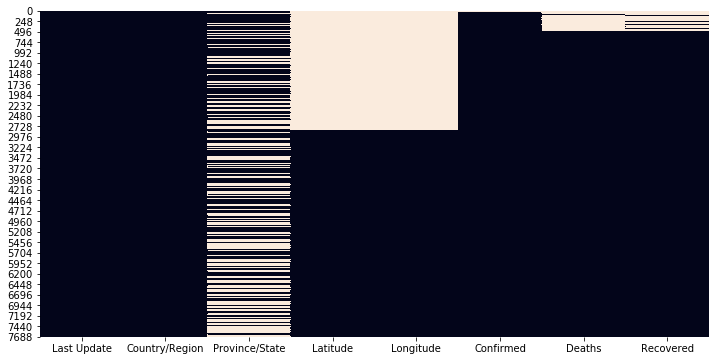

In [134]:
plt.subplots(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)

## Duplicates

In [135]:
# Example of duplicate.
df_aux = df[df['Last Update'].astype(str).str[:10] == '2020-03-01']
df_aux[df_aux['Country/Region']=='Mexico']

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2887,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0
3017,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0


We need to drop all the duplicates that the DataFrame has:

In [136]:
df = df.drop_duplicates()

In [95]:
# Check if ther are no more duplicates.
df_aux = df[df['Last Update'].astype(str).str[:10] == '2020-03-01']
df_aux[df_aux['Country/Region']=='Mexico']

,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2887,2020-03-01,Mexico,NaN,23.0,-102.0,5.0,0.0,0.0


## Unnesesary zeros

In [137]:
df_copy = df.copy()

In [138]:
print(len(df[df['Country/Region'] == 'Mexico']['Country/Region']))
df[df['Country/Region'] == 'Mexico']

20


,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
81,2020-01-23,Mexico,NaN,NaN,NaN,NaN,NaN,NaN
2679,2020-02-28,Mexico,NaN,NaN,NaN,1.0,0.0,0.0
2766,2020-02-29,Mexico,NaN,NaN,NaN,4.0,0.0,0.0
2887,2020-03-01,Mexico,NaN,23.0000,-102.0000,5.0,0.0,0.0
3163,2020-03-03,Mexico,NaN,23.0000,-102.0000,5.0,0.0,1.0
3662,2020-03-06,Mexico,NaN,23.0000,-102.0000,6.0,0.0,1.0
4098,2020-03-08,Mexico,NaN,23.0000,-102.0000,7.0,0.0,1.0
4630,2020-03-10,Mexico,NaN,23.0000,-102.0000,7.0,0.0,4.0
4849,2020-03-11,Mexico,NaN,23.0000,-102.0000,8.0,0.0,4.0
5056,2020-03-12,Mexico,NaN,23.0000,-102.0000,12.0,0.0,4.0


In [139]:
df = df.dropna(axis=0,thresh=5)
print(len(df[df['Country/Region'] == 'Mexico']['Country/Region']))
df[df['Country/Region'] == 'Mexico']

19


,Last Update,Country/Region,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
2679,2020-02-28,Mexico,NaN,NaN,NaN,1.0,0.0,0.0
2766,2020-02-29,Mexico,NaN,NaN,NaN,4.0,0.0,0.0
2887,2020-03-01,Mexico,NaN,23.0000,-102.0000,5.0,0.0,0.0
3163,2020-03-03,Mexico,NaN,23.0000,-102.0000,5.0,0.0,1.0
3662,2020-03-06,Mexico,NaN,23.0000,-102.0000,6.0,0.0,1.0
4098,2020-03-08,Mexico,NaN,23.0000,-102.0000,7.0,0.0,1.0
4630,2020-03-10,Mexico,NaN,23.0000,-102.0000,7.0,0.0,4.0
4849,2020-03-11,Mexico,NaN,23.0000,-102.0000,8.0,0.0,4.0
5056,2020-03-12,Mexico,NaN,23.0000,-102.0000,12.0,0.0,4.0
5312,2020-03-11,Mexico,NaN,23.6345,-102.5528,12.0,0.0,4.0


In [140]:
# Changed a date that was wrong
df['Last Update'][5312]=dt.datetime(2020,3,13)

# 3.5 Classes

In [141]:
countries = list(df['Country/Region'].unique())
countries.sort()
countries_dict = dict(zip(countries, [None]*len(countries)))
countries_dfs = countries_dict.copy()
for key in countries_dfs:
    
    countries_dfs[key] = make_time_series(df,country=key)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in double_scalars


In [142]:
class Values:
    
    def __init__(self,series,confirmed=None,deaths=None,recovered=None,mortality_rate=None,
                 new_confirmed=None,new_deaths=None,new_recovered=None,new_confirmed_percetage=None,
                new_deaths_percentage=None,new_recovered_percentage=None):
        
        last_local_update_date = series.index.max()
        
        self.series = series
        self.confirmed = series.loc[last_local_update_date]['Confirmed']
        self.deaths = series.loc[last_local_update_date]['Deaths']
        self.recovered = series.loc[last_local_update_date]['Recovered']
        self.mortality_rate = series.loc[last_local_update_date]['Mortality Rate']
        self.new_confirmed = series.loc[last_local_update_date]['Dif Confirmed']
        self.new_deaths = series.loc[last_local_update_date]['Dif Deaths']
        self.new_recovered = series.loc[last_local_update_date]['Dif Recovered']
        self.new_confirmed_percetage = series.loc[last_local_update_date]['Dif Confirmed%']
        self.new_deaths_percentage = series.loc[last_local_update_date]['Dif Deaths%']
        self.new_recovered_percentage = series.loc[last_local_update_date]['Dif Recovered%']
    
    def to_dict(self):
        keys_list = ['Confirmed', 'Deaths', 'Recovered',
                     'Mortality Rate', 'Dif Confirmed', 'Dif Confirmed%', 'Dif Deaths',
                     'Dif Deaths%', 'Dif Recovered', 'Dif Recovered%']
        values_list = [self.confirmed,self.deaths,self.recovered,self.mortality_rate,
                       self.new_confirmed,self.new_deaths,self.new_recovered,self.new_confirmed_percetage,
                       self.new_deaths_percentage,self.new_recovered_percentage]
        return dict(zip(keys_list,values_list))
    
class Country:
    
    def __init__(self,name,time_series=None,first_infection_date=None,values=None):
        self.name = name
        self.time_series = add_factor(countries_dfs[name],'Confirmed')
        self.first_infection_date = self.time_series.index.min()
        self.values = Values(self.time_series)
        
    
    
        
    
    

In [143]:
get_df_per_country('Mortality Rate').head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


,Mortality Rate
Puerto Rico,inf
Guam,inf
Sudan,0.500000
Gabon,0.200000
Guyana,0.142857
San Marino,0.125000
Indonesia,0.093385
Italy,0.092597
Iraq,0.085837
Algeria,0.084577


In [144]:
primary_keys = ['name','time_series','first_infection_date', 'values']
values_keys = ['confirmed','deaths','recuperated','mortality_rate','new_confirmed','new_deaths', 'new_recuperated']
print(len(primary_keys))
print(len(values_keys))

d = dict(zip(primary_keys,[None]*len(primary_keys)))
d['values'] = dict(zip(values_keys,[None]*len(values_keys)))
d

4
7


{'name': None,
 'time_series': None,
 'first_infection_date': None,
 'values': {'confirmed': None,
  'deaths': None,
  'recuperated': None,
  'mortality_rate': None,
  'new_confirmed': None,
  'new_deaths': None,
  'new_recuperated': None}}

# 4. Exploratory Data Analysis

In [145]:
df.columns

Index(['Last Update', 'Country/Region', 'Province/State', 'Latitude',
       'Longitude', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [146]:
export_country_df('Mexico')

In [690]:
Mexico = Country('Mexico')
Mexico.time_series = add_factor(Mexico.time_series,'Confirmed')
dias_mexico = (Mexico.time_series.index.to_list()[-1]-Mexico.time_series.index.to_list()[0]).days

dias_por_estimar = 30
keys = [i for i in range(dias_por_estimar)]
est_mexico = []
for i in range(dias_por_estimar):

    est_mexico.append(Mexico.values.confirmed * (factor_mexico)**i)

estimaciones = dict(zip(keys,est_mexico))

In [147]:
Country('Italy').values.confirmed

59138.0

In [693]:
last_update_date + dt.timedelta(days=25)

Timestamp('2020-04-14 00:00:00')

In [696]:
Mexico.time_series.to_csv('mexico.csv')

In [692]:
estimaciones

{0: 164.0,
 1: 206.54301075268816,
 2: 260.12204445600645,
 3: 327.59994039687905,
 4: 412.5821829998328,
 5: 519.6095503640367,
 6: 654.4007374880408,
 7: 824.1579180460942,
 8: 1037.9515715177288,
 9: 1307.2051377850967,
 10: 1646.3053953019291,
 11: 2073.371176610091,
 12: 2611.22149527373,
 13: 3288.5948132681247,
 14: 4141.684596817517,
 15: 5216.0732086263615,
 16: 6569.167468390995,
 17: 8273.266018659087,
 18: 10419.422391778986,
 19: 13122.310189646381,
 20: 16526.350332928305,
 21: 20813.427771443305,
 22: 26212.60997559459,
 23: 33012.38648808082,
 24: 41576.08352060716,
 25: 52361.27722958185,
 26: 65944.24296252445,
 27: 83050.74684930834,
 28: 104594.8249970456,
 29: 131727.62234170927}